In [30]:
# analysis link  - https://thecleverprogrammer.com/2024/08/12/inflation-impact-analysis-with-python/
# data link - https://statso.io/impact-of-inflation-case-study/#google_vignette


#Importing packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [31]:
inflation_data = pd.read_csv('/kaggle/input/inflation-impact-analysis/Inflation_Rates_Transformed-1.csv')
exchange_rate = pd.read_csv('/kaggle/input/inflation-impact-analysis/USD_INR_Exchange_Rates_1980_2024.csv')

In [32]:
inflation_data.head()

,Country,Year,Inflation Rate
0,India,1980,11.3
1,United States,1980,13.5
2,Emerging market and developing economies,1980,26.0
3,India,1981,12.7
4,United States,1981,10.4


In [33]:
exchange_rate.head()

,Year,Average Exchange Rate (INR/USD)
0,2003,45.476087
1,2004,45.188604
2,2005,44.003753
3,2006,45.183561
4,2007,41.192248


In [34]:
inflation_data['Country'].unique()

array(['India', 'United States',
       'Emerging market and developing economies'], dtype=object)

In [35]:
#filter tyhe inflation data for India and the united states
inflation_filtered_df = inflation_data[inflation_data['Country'].isin(['United States', 'India'])]

#pivot the inflation data to have seperate columns for India and the United States
inflation_pivot_df = inflation_filtered_df.pivot(index = 'Year', columns = 'Country', values = 'Inflation Rate').reset_index()

#merging the exchange rates
merged_df = pd.merge(exchange_rate, inflation_pivot_df, on = 'Year')

merged_df.head()

,Year,Average Exchange Rate (INR/USD),India,United States
0,2003,45.476087,4.1,2.3
1,2004,45.188604,4.0,2.7
2,2005,44.003753,3.7,3.4
3,2006,45.183561,6.7,3.2
4,2007,41.192248,5.9,2.9


In [36]:
#renaming columns
merged_df.columns = ['Year', 'Exchange Rate (INR/USD)', 'Inflation Rate (India)', 'Inflation Rate (United States)']
merged_df.head()

,Year,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
0,2003,45.476087,4.1,2.3
1,2004,45.188604,4.0,2.7
2,2005,44.003753,3.7,3.4
3,2006,45.183561,6.7,3.2
4,2007,41.192248,5.9,2.9


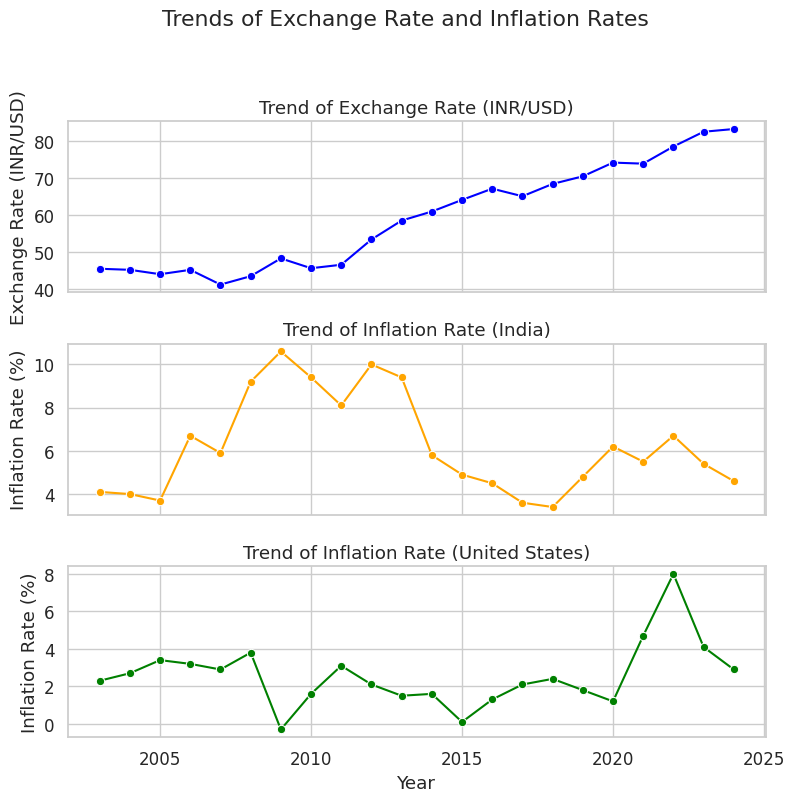

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9, 8), sharex=True)
plt.subplots_adjust(hspace=0.3)  # Adjust vertical spacing

# Plot 1: Exchange Rate
sns.lineplot(data=merged_df, x='Year', y='Exchange Rate (INR/USD)', 
             ax=ax1, color='blue', marker='o')
ax1.set_title('Trend of Exchange Rate (INR/USD)')
ax1.set_ylabel('Exchange Rate (INR/USD)')

# Plot 2: India Inflation
sns.lineplot(data=merged_df, x='Year', y='Inflation Rate (India)', 
             ax=ax2, color='orange', marker='o')
ax2.set_title('Trend of Inflation Rate (India)')
ax2.set_ylabel('Inflation Rate (%)')

# Plot 3: US Inflation
sns.lineplot(data=merged_df, x='Year', y='Inflation Rate (United States)', 
             ax=ax3, color='green', marker='o')
ax3.set_title('Trend of Inflation Rate (United States)')
ax3.set_ylabel('Inflation Rate (%)')
ax3.set_xlabel('Year')

# Main title
fig.suptitle('Trends of Exchange Rate and Inflation Rates', y=1.02)

plt.show()

### Interpretation
The exchange rate shows a general upward trend over the years, which indicates a depreciation of the Indian Rupee against the US Dollar. However, there are periods of both sharp increases and relative stability.

India’s inflation rate has fluctuated significantly over the years, with periods of high inflation (e.g., early 2000s) and more stable inflation in recent years. The United States has generally experienced lower and more stable inflation rates compared to India, with fewer extreme fluctuations.

## Correlation Analysis

In [38]:
correlation_matrix = merged_df[['Exchange Rate (INR/USD)',
                               'Inflation Rate (India)',
                               'Inflation Rate (United States)']].corr()

correlation_matrix

,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
Exchange Rate (INR/USD),1.000000,-0.337748,0.235321
Inflation Rate (India),-0.337748,1.000000,-0.120503
Inflation Rate (United States),0.235321,-0.120503,1.000000


#### Interpretation
1. **Exchange Rate vs. Inflation Rate (India)**: The correlation coefficient is approximately **-0.34**, which indicates a weak negative relationship. It suggests that as inflation in India increases, the INR tends to depreciate against the USD, though the relationship is not very strong.
   
2. **Exchange Rate vs. Inflation Rate (United States)**: The correlation coefficient is approximately **0.24**, which indicates a weak positive relationship. It suggests that higher inflation in the United States might be associated with a depreciation of the USD against the INR, but again, the relationship is not strong.

3. **Inflation Rate (India) vs. Inflation Rate (United States)**: The correlation between the inflation rates of India and the United States is very weak and negative **(-0.12)**, which indicates that the inflation rates in these two countries do not move together.

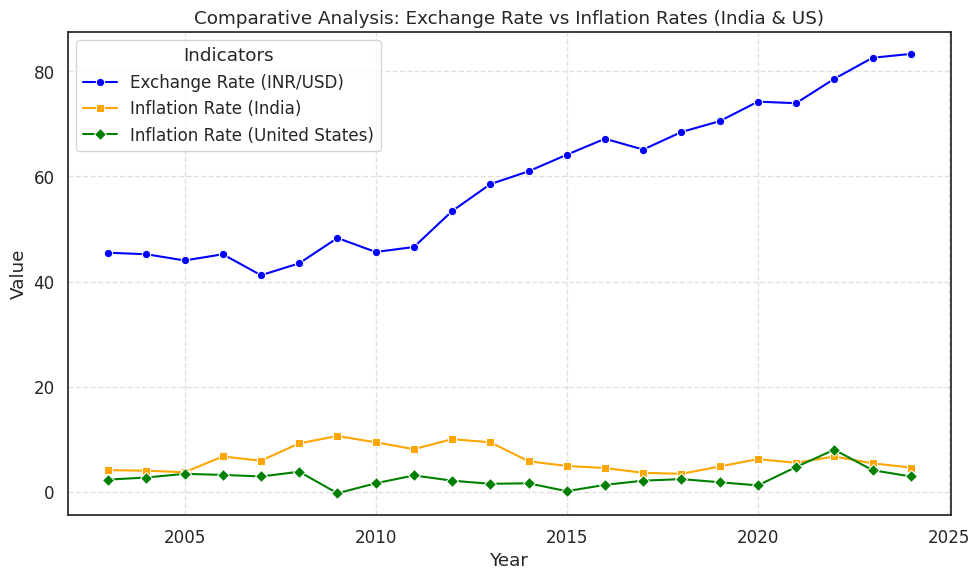

In [39]:
# Set style and context
sns.set_style("white")
sns.set_context("notebook", font_scale=1.1)

# Create figure
plt.figure(figsize=(10, 6))

# Plot all three lines with markers
sns.lineplot(data=merged_df, x='Year', y='Exchange Rate (INR/USD)', 
             color='blue', marker='o', label='Exchange Rate (INR/USD)')

sns.lineplot(data=merged_df, x='Year', y='Inflation Rate (India)', 
             color='orange', marker='s', label='Inflation Rate (India)')

sns.lineplot(data=merged_df, x='Year', y='Inflation Rate (United States)', 
             color='green', marker='D', label='Inflation Rate (United States)')

# Customize the plot
plt.title('Comparative Analysis: Exchange Rate vs Inflation Rates (India & US)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Indicators')

# Add grid and adjust layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()